In [1]:
from vnstock import *
from function import *
from operators import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

##### VN30

In [18]:
x='2023-02-14'
ticket = ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']
frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date=x)    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")
volume = q.pivot_table(values="Volume", columns="ticker", index="TradingDate")

In [9]:
close= close.to_csv("Data/close.csv",mode="a",header=False)
high= high.to_csv("Data/high.csv",mode="a",header=False)
low= low.to_csv("Data/low.csv",mode="a",header=False)
open= open.to_csv("Data/open.csv",mode="a",header=False)
volume= volume.to_csv("Data/open.csv",mode="a",header=False)

In [21]:
close= pd.read_csv("Data/close.csv",index_col="TradingDate")
close.index = pd.to_datetime(close.index)
high= pd.read_csv("Data/high.csv",index_col="TradingDate")
high.index = pd.to_datetime(high.index)
low= pd.read_csv("Data/low.csv",index_col="TradingDate")
low.index = pd.to_datetime(low.index)
open= pd.read_csv("Data/open.csv",index_col="TradingDate")
open.index = pd.to_datetime(open.index)
volume= pd.read_csv("Data/volume.csv",index_col="TradingDate")
volume.index = pd.to_datetime(open.index)

### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

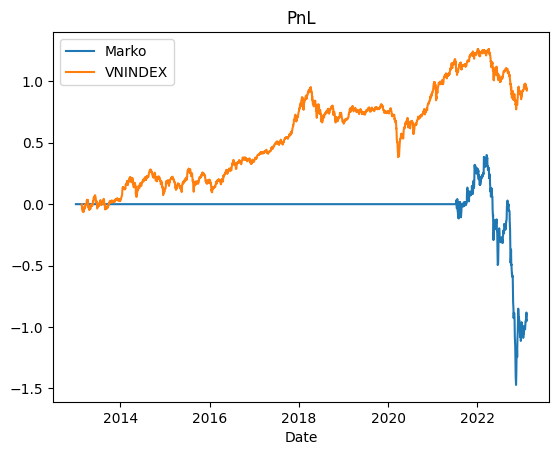

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [3]:
close_t5=close-close.shift(5)

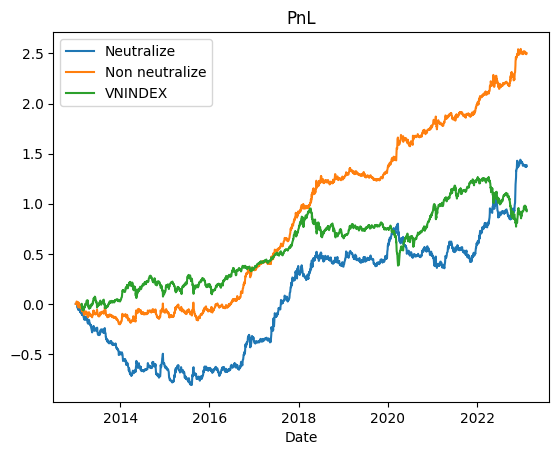

In [4]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [59]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.116131,1.026037,0.581226,0.458632,199.803249


In [60]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.289115,-2.886706,0.628499,-1.957878,-460.008984
2014,-0.027787,-0.257894,0.603191,-0.055352,-46.065815
2015,0.025631,0.238350,0.585701,0.049861,43.760729
2016,0.372940,3.047322,0.581179,2.441085,641.695733
2017,0.467491,3.511050,0.542485,3.259341,861.758345
2018,0.032162,0.279907,0.577621,0.066049,55.680814
2019,0.094289,1.042111,0.622486,0.405582,151.471136
2020,-0.009300,-0.083557,0.577321,-0.010605,-16.109737
2021,0.139454,1.403362,0.563189,0.698326,247.614661


In [61]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.250125,1.453026,0.594381,0.942582,420.81521


In [62]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.201883,-1.312268,0.633236,-0.740952,-318.811946
2014,0.116070,0.680709,0.611300,0.296616,189.873894
2015,0.022471,0.146641,0.596954,0.028451,37.643256
2016,0.403735,2.814558,0.548013,2.415812,736.725821
2017,0.581298,4.198096,0.518273,4.446033,1121.606869
2018,0.329990,1.630178,0.582216,1.227280,566.783493
2019,0.124867,1.159499,0.625107,0.518224,199.753455
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.210838,1.288363,0.609508,0.757745,345.914824


### alpha = rank(ts_delta(close,5))

In [3]:
alpha = rank(ts_delta(close,5))
w =weights(alpha)
w1 =weights(alpha,neutrali=1)

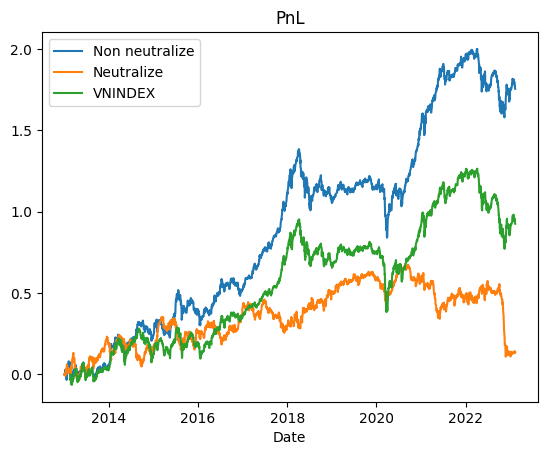

In [4]:
returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(-1*w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()


In [5]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.175442,0.890848,0.279455,0.705854,627.801844


In [6]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.013438,0.079706,1.155663,0.008595,11.627919


### alpha2 = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [7]:
alpha2 = rank(ts_std(close,20)/(ts_sum(close,20)/20))

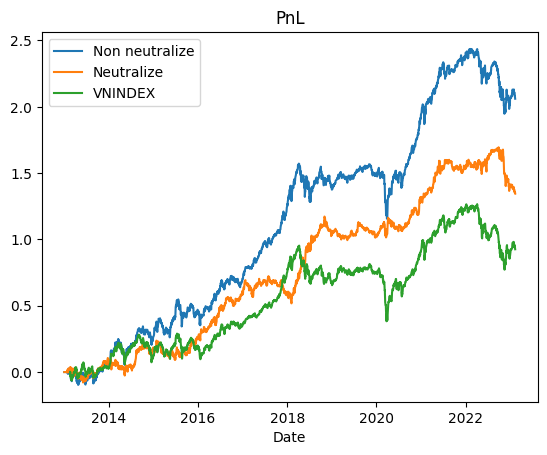

In [8]:
w =weights(alpha2, neutrali=0)
w1 =weights(alpha2,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [9]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.205999,0.929871,0.077905,1.512068,2644.216304


In [40]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.134427,0.752887,0.321123,0.487122,418.615541


### alpha3 = (close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [10]:
alpha3 = (close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

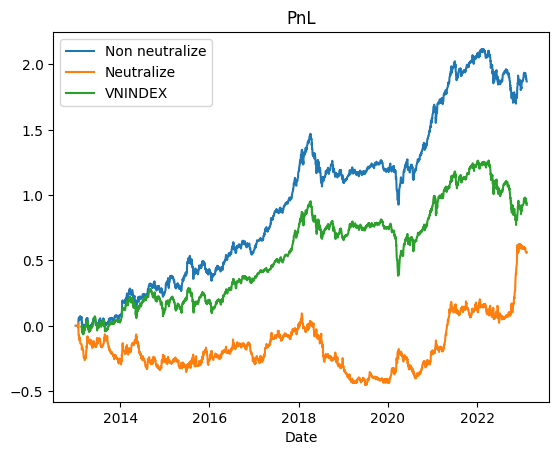

In [11]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [12]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.186949,0.97842,0.238743,0.865809,783.056815


In [13]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.056085,0.297724,1.034103,0.069336,54.235464


### alpha4 = close-ts_product(close,2)^0.5

In [3]:
alpha4 = close-ts_product(close,2)**0.5

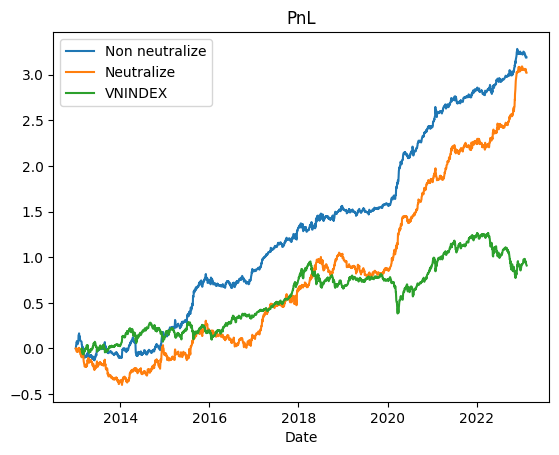

In [4]:
w = weights(alpha4,neutrali=0)
w1 =weights(alpha4,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [5]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.31883,1.775482,1.331533,0.868801,239.445986


In [5]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.098033,-0.529439,1.276389,-0.146727,-76.804928
2014,0.229845,1.309484,1.287131,0.553358,178.571520
2015,0.622227,2.969580,1.243514,2.100604,500.378276
2016,0.103313,0.649422,1.295763,0.183375,79.731055
2017,0.476558,3.319054,1.246933,2.051873,382.183888
2018,0.210365,0.961280,1.371960,0.376414,153.331701
2019,0.056355,0.513905,1.415318,0.102547,39.817988
2020,0.842759,4.331601,1.320395,3.460574,638.262681
2021,0.411932,2.371984,1.389048,1.291712,296.556870


In [6]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.301959,1.411115,2.430707,0.497359,124.226695


In [6]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.359061,-1.754053,2.312435,-0.691181,-155.274046
2014,0.299167,1.430793,2.311373,0.514753,129.432677
2015,0.249485,0.983844,2.235507,0.328670,111.600973
2016,-0.066890,-0.354102,2.317505,-0.060159,-28.863083
2017,0.535188,2.388655,2.274992,1.158555,235.248277
2018,0.345574,1.514616,2.504258,0.562643,137.994389
2019,-0.122001,-0.746167,2.611006,-0.161292,-46.725579
2020,0.971639,4.840022,2.391936,3.084786,406.214363
2021,0.402777,1.950924,2.588527,0.769566,155.600646


### alpha6
a = ts_sum(open>close,20)/ts_sum(open<close,20);

b = ts_sum(open>close,250)/ts_sum(open<close,250);

rank(a/b)

In [20]:
a=ts_sum(1*(open>close),20)/ts_sum(1*(open<close),20)
b=ts_sum(1*(open>close),250)/ts_sum(1*(open<close),250)
alpha6=rank(a/b)

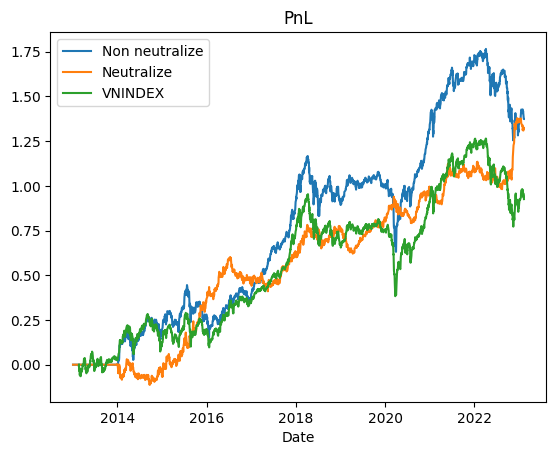

In [21]:
w =weights(alpha6, neutrali=0)
w1 =-1*weights(alpha6,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [22]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.137306,0.704386,0.121601,0.748492,1129.154626


In [23]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.132059,0.910868,0.501322,0.467499,263.420573


### alpha7=ts_zscore(close,2)

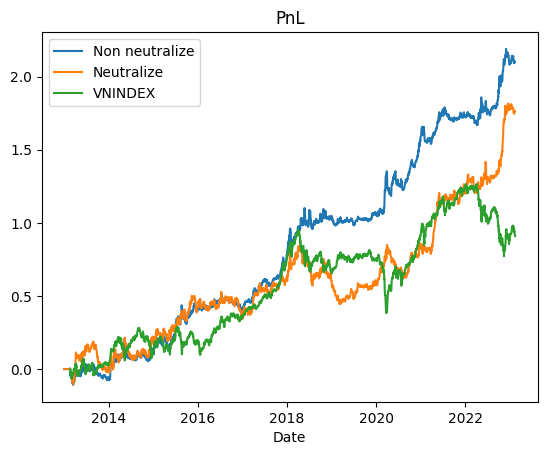

In [25]:
alpha7 = ts_zscore(close,30)
w =weights(alpha7, neutrali=0)
w1 =weights(alpha7,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [17]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.21108,1.233284,0.331917,0.983494,635.941938


In [8]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.064092,-0.517941,0.334364,-0.226763,-191.683652
2014,0.164754,0.994317,0.348389,0.683772,472.903536
2015,0.308903,1.723217,0.329832,1.667650,936.547681
2016,0.000275,0.002131,0.357286,0.000059,0.769122
2017,0.381386,3.450567,0.326877,3.727181,1166.756143
2018,0.250554,1.128692,0.307966,1.018062,813.575715
2019,0.037460,0.418835,0.331373,0.140820,113.043539
2020,0.518872,2.332487,0.301202,3.061403,1722.672814
2021,0.142905,0.861529,0.335424,0.562337,426.043487


In [9]:
w.iloc[-1,:].sort_values(ascending=False)

VCB    0.043158
SAB    0.037744
BID    0.033565
HDB    0.031564
PLX    0.029452
GAS    0.018974
BCM    0.017420
CTG    0.005394
FPT    0.003142
HPG    0.002381
TPB    0.001542
VRE    0.000596
POW    0.000104
BVH   -0.003832
ACB   -0.004756
STB   -0.008094
VIB   -0.012742
MBB   -0.020338
SSI   -0.031250
MWG   -0.031469
MSN   -0.035352
TCB   -0.039177
GVR   -0.042732
VIC   -0.050364
VNM   -0.054764
VJC   -0.074882
VHM   -0.078724
VPB   -0.081651
PDR   -0.096943
NVL   -0.107893
Name: 2023-02-13 00:00:00, dtype: float64

In [5]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.176338,0.916854,0.733388,0.449579,240.442761


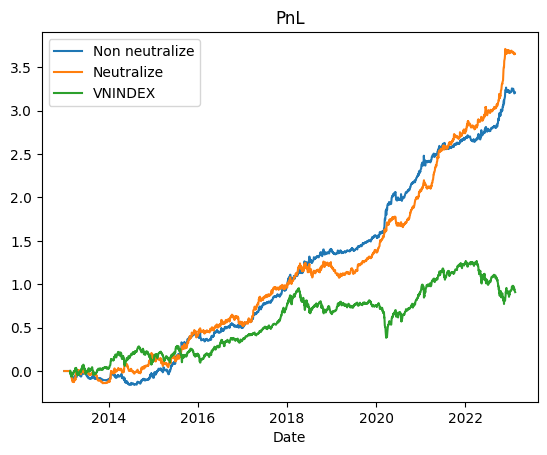

In [10]:
alpha = (0.3*alpha7+0.7*ts_zscore(close,2))
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [27]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.32117,2.053349,0.822078,1.283435,390.680698


In [11]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.098675,-0.999891,0.294665,-0.578618,-334.872133
2014,0.021326,0.159988,0.536806,0.031888,39.727162
2015,0.486856,3.053574,0.773049,2.423288,629.786208
2016,0.093690,0.721912,0.772538,0.251403,121.275226
2017,0.487511,4.813249,0.907573,3.527682,537.158267
2018,0.402199,1.935975,0.942051,1.264979,426.940003
2019,0.177017,2.068106,0.918968,0.907673,192.625383
2020,0.764383,3.721113,0.949928,3.337976,804.675310
2021,0.362637,2.186176,0.992600,1.321399,365.340680


In [26]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.366223,2.032604,1.605508,0.970777,228.104246


In [12]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.121297,-0.949902,0.446985,-0.494832,-271.367943
2014,0.253428,1.372207,0.896481,0.729586,282.692388
2015,0.281357,1.337242,1.430049,0.593149,196.746631
2016,0.123436,0.760595,1.348991,0.230075,91.502520
2017,0.462440,2.977805,1.853925,1.487229,249.438360
2018,0.212957,0.917527,1.906243,0.306673,111.715520
2019,0.189158,1.486469,1.874284,0.472227,100.922833
2020,0.697736,4.367199,1.952334,2.610786,357.385357
2021,0.660119,3.606624,1.970252,2.087619,335.043017


In [13]:
w.iloc[-1,:].sort_values(ascending=False)

SAB    0.044498
BID    0.042673
CTG    0.030369
VRE    0.028274
STB    0.024479
MWG    0.014270
MSN    0.012574
VJC   -0.004690
VCB   -0.009165
HDB   -0.014229
PLX   -0.015151
GAS   -0.019727
BCM   -0.020406
HPG   -0.026974
TPB   -0.027341
POW   -0.027969
BVH   -0.029688
ACB   -0.030091
VIB   -0.033579
MBB   -0.036896
SSI   -0.041662
TCB   -0.045124
GVR   -0.046676
VIC   -0.050010
VNM   -0.051931
VHM   -0.062395
VPB   -0.063674
PDR   -0.070352
NVL   -0.075134
FPT         NaN
Name: 2023-02-13 00:00:00, dtype: float64

In [33]:
save_weights(w,x)

In [37]:
pd.read_csv("Weights/Weights.csv").sort_values(by=["Delta"],ascending=False)

,Unnamed: 0,2/10/2023,2/13/2023,2023-02-14,Delta
20,TPB,-0.006468,-0.018980,0.014937,0.033917
28,BVH,0.056733,-0.022911,0.007106,0.030017
14,HPG,-0.013611,-0.018366,0.011400,0.029766
22,POW,NaN,-0.020032,0.009459,0.029491
26,PLX,0.060607,0.001435,0.027492,0.026057
13,GAS,-0.002060,-0.006229,0.017992,0.024222
18,VIB,-0.019417,-0.029428,-0.005782,0.023645
17,HDB,0.009423,0.002980,0.025509,0.022530
10,TCB,-0.051468,-0.048763,-0.030467,0.018296
12,ACB,-0.021187,-0.023586,-0.006288,0.017298


## Q learning

In [41]:
import numpy as np
import pandas as pd
import random

# Load the time series data into a pandas DataFrame
data = close

# Define the Q-Learning algorithm
def q_learning(data, n_actions, alpha, gamma, epsilon, max_steps):
    # Initialize the Q-table with zeros
    Q = np.zeros((data.shape[0], n_actions))

    for i in range(max_steps):
        # Initialize the state
        state = np.random.randint(0, data.shape[0])
        
        # Choose an action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q[state, :])

        next_state = state + 1
        # Get the next state and reward based on the action
        if next_state == len(close):
            next_state = np.random.randint(0,len(close))
            reward = 0
        else:    
            reward = data.iloc[next_state, action] - data.iloc[state, action]
        
        # Update the Q-table using Bellman equation
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))
    
    return Q

# Define the number of actions (i.e., the number of stocks to invest in)
n_actions = 30

# Define the learning rate, discount factor, and exploration rate
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Define the number of steps
max_steps = 100000

# Run the Q-Learning algorithm
Q = q_learning(data, n_actions, alpha, gamma, epsilon, max_steps)

df = pd.DataFrame(Q)

In [46]:
weights=df.div(df.abs().sum(axis=1),axis=0)
weights.columns = ticket
weights.index = close.index

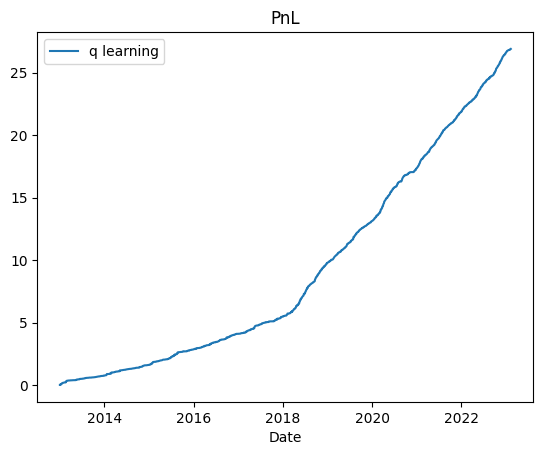

In [47]:
a = Simresult(weights,close.pct_change())
a.plot_pnl("q learning")

In [48]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.773968,6.460941,0.064721,16.076898,11958.554364
2014,0.872495,7.231508,0.119713,19.105361,7288.225908
2015,1.253939,7.288349,0.085290,23.084068,14702.028784
2016,1.257116,8.700565,0.124208,27.591801,10121.034219
2017,1.377069,6.828175,0.130227,22.204080,10574.411802
2018,4.326821,14.200458,1.235858,26.570670,3501.065946
2019,3.394455,15.632685,1.694747,22.124127,2002.926915
2020,4.231992,14.073931,1.323556,25.166140,3197.439847
2021,4.569020,18.941651,1.659955,31.425425,2752.495911


In [49]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,2.689725,11.166385,0.815207,20.283014,3299.436631
